<a href="https://colab.research.google.com/github/sajadalipour7/MachineLearning-Trainings/blob/master/DeepLearning-using-Tensorgflow/digi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TF version:",tf.__version__)

TF version: 2.3.0


In [2]:
import tensorflow_hub as hub
print("TF Hub version:",hub.__version__)

# Check for GPU availability
print("GPU","available!" if tf.config.list_physical_devices("GPU") else "not available!")

TF Hub version: 0.9.0
GPU available!


In [25]:
import pandas as pd
import os

In [105]:
blacks=os.listdir("drive/My Drive/DataSetDigi4/train/black/")
blues=os.listdir("drive/My Drive/DataSetDigi4/train/blue/")
browns=os.listdir("drive/My Drive/DataSetDigi4/train/brown/")
greens=os.listdir("drive/My Drive/DataSetDigi4/train/green/")
greys=os.listdir("drive/My Drive/DataSetDigi4/train/grey/")
oranges=os.listdir("drive/My Drive/DataSetDigi4/train/orange/")
pinks=os.listdir("drive/My Drive/DataSetDigi4/train/pink/")
purples=os.listdir("drive/My Drive/DataSetDigi4/train/purple/")
reds=os.listdir("drive/My Drive/DataSetDigi4/train/red/")
silvers=os.listdir("drive/My Drive/DataSetDigi4/train/silver/")
whites=os.listdir("drive/My Drive/DataSetDigi4/train/white/")
yellows=os.listdir("drive/My Drive/DataSetDigi4/train/yellow/")

In [91]:
def make_df_by_color(arr,color):
  df=pd.DataFrame({"id":arr,"color":color})
  return df

In [106]:
df_blacks=make_df_by_color(blacks,"black")
df_blues=make_df_by_color(blues,"blue")
df_browns=make_df_by_color(browns,"brown")
df_greens=make_df_by_color(greens,"green")
df_greys=make_df_by_color(greys,"grey")
df_oranges=make_df_by_color(oranges,"orange")
df_pinks=make_df_by_color(pinks,"pink")
df_purples=make_df_by_color(purples,"purple")
df_reds=make_df_by_color(reds,"red")
df_silvers=make_df_by_color(silvers,"silver")
df_whites=make_df_by_color(whites,"white")
df_yellows=make_df_by_color(yellows,"yellow")

In [108]:
labels_csv=pd.concat([df_blacks,df_blues,df_browns,df_greens,df_greys,df_oranges,df_pinks,df_purples,df_reds,df_silvers,df_whites,df_yellows],
                     ignore_index=True)
labels_csv.to_csv("drive/My Drive/tmp.csv")

In [65]:
len(labels_csv)

6244

In [115]:

filenames=["drive/My Drive/DataSetDigi4/train/"+row["color"]+"/"+row["id"] for index,row in labels_csv.iterrows()]
filenames[:10]

['drive/My Drive/DataSetDigi4/train/black/115459934.jpg',
 'drive/My Drive/DataSetDigi4/train/black/105233419.jpg',
 'drive/My Drive/DataSetDigi4/train/black/116977884.jpg',
 'drive/My Drive/DataSetDigi4/train/black/116986877.jpg',
 'drive/My Drive/DataSetDigi4/train/black/105241558.jpg',
 'drive/My Drive/DataSetDigi4/train/black/116983509.jpg',
 'drive/My Drive/DataSetDigi4/train/black/116977156.jpg',
 'drive/My Drive/DataSetDigi4/train/black/105231634.jpg',
 'drive/My Drive/DataSetDigi4/train/black/105235845.jpg',
 'drive/My Drive/DataSetDigi4/train/black/116994633.jpg']

In [111]:
len(filenames)

6244

In [81]:
from IPython.display import Image

drive/My Drive/DataSetDigi4/train/yellow/117151667.jpg 117151667.jpg


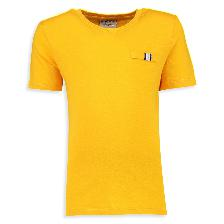

In [119]:
print(filenames[6100],labels_csv["id"][6100])
Image(filenames[6100])

In [120]:
import numpy as np

In [121]:
labels=labels_csv["color"].to_numpy()
labels

array(['black', 'black', 'black', ..., 'yellow', 'yellow', 'yellow'],
      dtype=object)

In [122]:
len(labels)

6244

In [123]:
unique_colors=np.unique(labels)
unique_colors

array(['black', 'blue', 'brown', 'green', 'grey', 'orange', 'pink',
       'purple', 'red', 'silver', 'white', 'yellow'], dtype=object)

In [124]:
labels[0]==unique_colors

array([ True, False, False, False, False, False, False, False, False,
       False, False, False])

In [125]:
boolean_labels=[label==unique_colors for label in labels]
boolean_labels[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False])]

In [126]:
len(boolean_labels)

6244

In [127]:
X=filenames
y=boolean_labels

In [128]:
from matplotlib.pyplot import imread

In [129]:
image=imread(filenames[20])
image.shape

(224, 224, 3)

In [130]:
IMG_SIZE=224
def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """

  # Read in an image file
  image=tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels(Red,Green,Blue)
  image=tf.image.decode_jpeg(image,channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired value (224,224)
  image=tf.image.resize(image,size=[img_size,img_size])

  return image

In [131]:
def get_image_label(image_path,label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and returns a tuple of (image,label)
  """
  image=process_image(image_path)
  return image,label

In [135]:
(process_image(X[2000]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [139]:
BATCH_SIZE=32

# Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset,we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch=data.map(process_image).batch(batch_size)
    return data_batch
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X) , # file paths
                                             tf.constant(y))) # labels
    data_batch=data.map(get_image_label).batch(batch_size)     
    return data_batch  
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors    
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y))) 
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data=data.shuffle(buffer_size=len(X))

    # Create (image,label) tuples (this also turns the image paths into a preprocessed image)
    data=data.map(get_image_label)

    # Turn the training data into batches
    data_batch=data.batch(batch_size) 
    return data_batch   

In [140]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """

  # Setup the figure 
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows,5 columns)
    ax=plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_colors[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [141]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] # batch, height,width,color channels

# Setup output shape of our model
OUTPUT_SHAPE=len(unique_colors)

# Setup model URL from TensorFlow Hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [142]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [143]:
NUM_EPOCHS=100

In [144]:
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model=create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard=create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  
  # Return the fitted model
  return model

In [147]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_colors[np.argmax(prediction_probabilities)]

In [148]:
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and 
  returns separate arrays of images and labels.
  """
  images=[]
  labels=[]
  # Loop through unbatched data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_colors[np.argmax(label)])
  return images,labels

In [149]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  # Get the pred label
  pred_label=get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the titile depending on if the prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  # Change plot title to be predicted ,probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [150]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob,true_label=prediction_probabilities[n],labels[n]

  # Get the predicted label
  pred_label=get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels=unique_colors[top_10_pred_indexes]

  # Setup plot
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  # Change color of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

In [155]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir=os.path.join("drive/My Drive/DataSetDigi4/logs",
                      # Make it so the logs get tracked whenever we run an experiment
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Creating model

In [151]:
full_data=create_data_batches(X,y)

Creating training data batches...


In [152]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 12)), types: (tf.float32, tf.bool)>

In [153]:
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [156]:
# Create full model callbacks
full_model_tensorboard=create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)

In [157]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
  1/196 [..............................] - ETA: 0s - loss: 3.2084 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


196/196 [==============================] - 3931s 20s/step - loss: 1.6867 - accuracy: 0.4792
Epoch 2/100
196/196 [==============================] - 24s 125ms/step - loss: 1.0958 - accuracy: 0.6520
Epoch 3/100
196/196 [==============================] - 24s 124ms/step - loss: 0.9597 - accuracy: 0.6856
Epoch 4/100
196/196 [==============================] - 24s 124ms/step - loss: 0.8890 - accuracy: 0.7082
Epoch 5/100
196/196 [==============================] - 24s 125ms/step - loss: 0.8248 - accuracy: 0.7301
Epoch 6/100
196/196 [==============================] - 24s 124ms/step - loss: 0.7862 - accuracy: 0.7412
Epoch 7/100
196/196 [==============================] - 24s 124ms/step - loss: 0.7558 - accuracy: 0.7535
Epoch 8/100
196/196 [==============================] - 24s 124ms/step - loss: 0.7303 - accuracy: 0.7601
Epoch 9/100
196/196 [==============================] - 24s 124ms/step - loss: 0.7066 - accuracy: 0.7665
Epoch 10/100
196/196 [==============================] - 24s 124ms/step - los

In [158]:
def save_model(model,suffix=None):
  """
  Saves a given model in models directory and appends a suffix(string).
  """
  # Create a model directory pathname with current time
  modeldir=os.path.join("drive/My Drive/Dog Vision/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+"-"+suffix+".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [159]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [161]:
save_model(full_model,suffix="digi")

Saving model to: drive/My Drive/Dog Vision/models/20200929-16251601396758-digi.h5...


'drive/My Drive/Dog Vision/models/20200929-16251601396758-digi.h5'

In [162]:
loaded_full_model=load_model("drive/My Drive/Dog Vision/models/20200929-16251601396758-digi.h5")

Loading saved model from: drive/My Drive/Dog Vision/models/20200929-16251601396758-digi.h5


In [163]:
test_path="drive/My Drive/DataSetDigi4/test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/DataSetDigi4/test/115498139.jpg',
 'drive/My Drive/DataSetDigi4/test/116951645.jpg',
 'drive/My Drive/DataSetDigi4/test/117012519.jpg',
 'drive/My Drive/DataSetDigi4/test/117051183.jpg',
 'drive/My Drive/DataSetDigi4/test/115481578.jpg',
 'drive/My Drive/DataSetDigi4/test/115508282.jpg',
 'drive/My Drive/DataSetDigi4/test/117061566.jpg',
 'drive/My Drive/DataSetDigi4/test/105475443.jpg',
 'drive/My Drive/DataSetDigi4/test/1000001547.jpg',
 'drive/My Drive/DataSetDigi4/test/116987531.jpg']

In [164]:
len(test_filenames)

2683

In [165]:
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [166]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [167]:
test_predictions=loaded_full_model.predict(test_data,verbose=1)

84/84 [==============================] - 1650s 20s/step


In [169]:
np.savetxt("drive/My Drive/DataSetDigi4/preds_array.csv",test_predictions,delimiter=",")

In [170]:
test_predictions=np.loadtxt("drive/My Drive/DataSetDigi4/preds_array.csv",delimiter=",")

In [171]:
test_predictions[:10]

array([[3.76625976e-05, 1.09512417e-04, 2.17736204e-04, 7.45983343e-05,
        1.78353507e-02, 2.50709160e-08, 1.98727910e-04, 1.04594787e-04,
        1.75110108e-05, 6.51172340e-01, 3.30196381e-01, 3.55547309e-05],
       [9.89783466e-01, 2.37111840e-03, 1.75597717e-03, 4.89416067e-03,
        6.84573524e-06, 1.16892090e-06, 1.60184034e-04, 9.44538042e-04,
        1.00806365e-05, 4.09778238e-08, 5.80636333e-05, 1.42978261e-05],
       [1.57493781e-02, 8.54752585e-02, 2.74900831e-02, 6.88784897e-01,
        2.26101489e-03, 4.62671276e-04, 1.06541185e-04, 5.39119467e-02,
        1.20192014e-01, 2.12067889e-07, 6.97859068e-05, 5.49616618e-03],
       [4.23998517e-06, 2.27597731e-04, 7.18885929e-07, 8.80529624e-05,
        2.18556961e-04, 7.76566083e-07, 3.38926247e-06, 2.31374088e-05,
        1.76107346e-06, 1.08222275e-05, 9.99412775e-01, 8.09671292e-06],
       [2.73695673e-06, 3.36586083e-07, 4.16603424e-02, 1.03562325e-03,
        2.14155571e-05, 2.37740725e-01, 6.80916846e-01, 7.55

In [172]:
test_predictions.shape

(2683, 12)

In [173]:
preds_df=pd.DataFrame(columns=["id"]+list(unique_colors))
preds_df.head()

,id,black,blue,brown,green,grey,orange,pink,purple,red,silver,white,yellow


In [174]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids

['115498139',
 '116951645',
 '117012519',
 '117051183',
 '115481578',
 '115508282',
 '117061566',
 '105475443',
 '1000001547',
 '116987531',
 '117050881',
 '117093310',
 '117067207',
 '115475060',
 '116993999',
 '117216597',
 '105364447',
 '105443083',
 '105392474',
 '117203522',
 '117129940',
 '115463666',
 '117221595',
 '105763573',
 '116995382',
 '117205972',
 '115461743',
 '105348726',
 '105234213',
 '105412161',
 '105649315',
 '115496091',
 '117024882',
 '116955367',
 '115264616',
 '115474726',
 '105842195',
 '117012499',
 '115490134',
 '117017537',
 '117125673',
 '115504030',
 '116997696',
 '117053999',
 '117032695',
 '105516600',
 '105419436',
 '116949280',
 '105277877',
 '105809321',
 '117212958',
 '115487076',
 '105344084',
 '117092532',
 '117240060',
 '105432845',
 '1000008822',
 '105382972',
 '105611926',
 '117022681',
 '105241765',
 '115253211',
 '105840674',
 '105442695',
 '116991106',
 '105546133',
 '105576758',
 '115475909',
 '105340168',
 '105299886',
 '117218111',
 '11

In [175]:
preds_df["id"]=test_ids

In [176]:
preds_df.head()

,id,black,blue,brown,green,grey,orange,pink,purple,red,silver,white,yellow
0,115498139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116951645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117012519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,117051183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,115481578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
preds_df[list(unique_colors)]=test_predictions
preds_df.head()

,id,black,blue,brown,green,grey,orange,pink,purple,red,silver,white,yellow
0,115498139,3.76626e-05,0.000109512,0.000217736,7.45983e-05,0.0178354,2.50709e-08,0.000198728,0.000104595,1.7511e-05,0.651172,0.330196,3.55547e-05
1,116951645,0.989783,0.00237112,0.00175598,0.00489416,6.84574e-06,1.16892e-06,0.000160184,0.000944538,1.00806e-05,4.09778e-08,5.80636e-05,1.42978e-05
2,117012519,0.0157494,0.0854753,0.0274901,0.688785,0.00226101,0.000462671,0.000106541,0.0539119,0.120192,2.12068e-07,6.97859e-05,0.00549617
3,117051183,4.23999e-06,0.000227598,7.18886e-07,8.8053e-05,0.000218557,7.76566e-07,3.38926e-06,2.31374e-05,1.76107e-06,1.08222e-05,0.999413,8.09671e-06
4,115481578,2.73696e-06,3.36586e-07,0.0416603,0.00103562,2.14156e-05,0.237741,0.680917,7.55129e-05,1.65914e-06,0.00338636,0.00354299,0.0316155


In [179]:
preds_df.to_csv("drive/My Drive/DataSetDigi4/full_model_predictions_1.csv",
                index=False)

In [180]:
custom_path="drive/My Drive/DataSetDigi4/test/"
custom_image_paths=[custom_path+fname for fname in os.listdir(custom_path)]

In [181]:
custom_image_paths

['drive/My Drive/DataSetDigi4/test/115498139.jpg',
 'drive/My Drive/DataSetDigi4/test/116951645.jpg',
 'drive/My Drive/DataSetDigi4/test/117012519.jpg',
 'drive/My Drive/DataSetDigi4/test/117051183.jpg',
 'drive/My Drive/DataSetDigi4/test/115481578.jpg',
 'drive/My Drive/DataSetDigi4/test/115508282.jpg',
 'drive/My Drive/DataSetDigi4/test/117061566.jpg',
 'drive/My Drive/DataSetDigi4/test/105475443.jpg',
 'drive/My Drive/DataSetDigi4/test/1000001547.jpg',
 'drive/My Drive/DataSetDigi4/test/116987531.jpg',
 'drive/My Drive/DataSetDigi4/test/117050881.jpg',
 'drive/My Drive/DataSetDigi4/test/117093310.jpg',
 'drive/My Drive/DataSetDigi4/test/117067207.jpg',
 'drive/My Drive/DataSetDigi4/test/115475060.jpg',
 'drive/My Drive/DataSetDigi4/test/116993999.jpg',
 'drive/My Drive/DataSetDigi4/test/117216597.jpg',
 'drive/My Drive/DataSetDigi4/test/105364447.jpg',
 'drive/My Drive/DataSetDigi4/test/105443083.jpg',
 'drive/My Drive/DataSetDigi4/test/105392474.jpg',
 'drive/My Drive/DataSetDigi4/

In [182]:
custom_data=create_data_batches(custom_image_paths,test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [183]:
custom_preds=loaded_full_model.predict(custom_data)

In [184]:
custom_preds.shape

(2683, 12)

In [185]:
custom_preds_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['silver',
 'black',
 'green',
 'white',
 'pink',
 'yellow',
 'blue',
 'green',
 'green',
 'black',
 'orange',
 'green',
 'green',
 'silver',
 'black',
 'green',
 'white',
 'brown',
 'brown',
 'orange',
 'green',
 'brown',
 'green',
 'yellow',
 'white',
 'red',
 'black',
 'black',
 'brown',
 'blue',
 'grey',
 'red',
 'pink',
 'blue',
 'white',
 'green',
 'red',
 'silver',
 'silver',
 'orange',
 'grey',
 'red',
 'black',
 'grey',
 'blue',
 'grey',
 'grey',
 'white',
 'black',
 'green',
 'yellow',
 'pink',
 'green',
 'black',
 'red',
 'brown',
 'white',
 'white',
 'brown',
 'orange',
 'black',
 'green',
 'grey',
 'brown',
 'white',
 'brown',
 'silver',
 'white',
 'red',
 'blue',
 'grey',
 'grey',
 'yellow',
 'yellow',
 'black',
 'silver',
 'red',
 'blue',
 'blue',
 'white',
 'blue',
 'yellow',
 'green',
 'grey',
 'red',
 'purple',
 'green',
 'grey',
 'white',
 'pink',
 'red',
 'white',
 'silver',
 'grey',
 'brown',
 'red',
 'black',
 'black',
 'red',
 'brown',
 'blue',
 'white',
 'silver

In [186]:
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [190]:
custom_images[:10]

[array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=float32), array([[[1., 1., 1.],
         [1., 1., 

In [194]:
def showMe(i):
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(custom_images[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


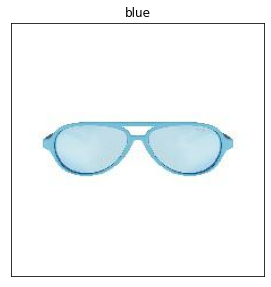

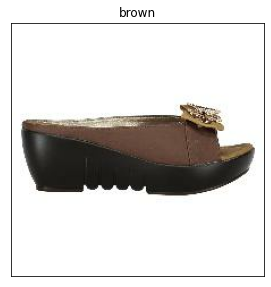

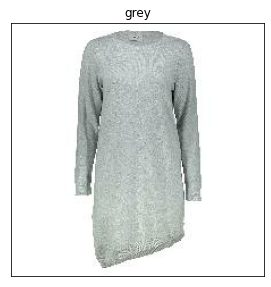

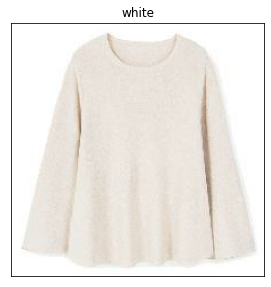

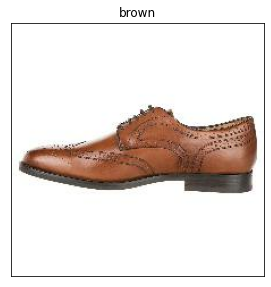

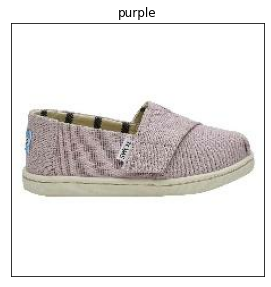

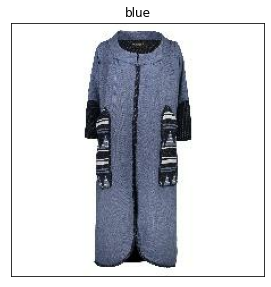

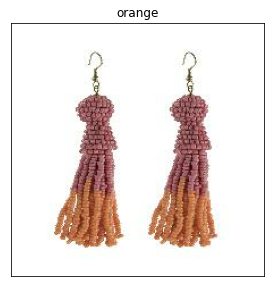

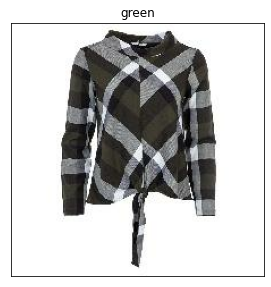

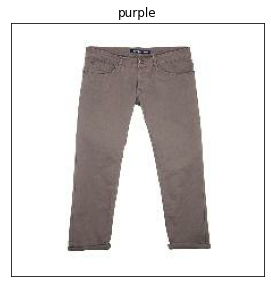

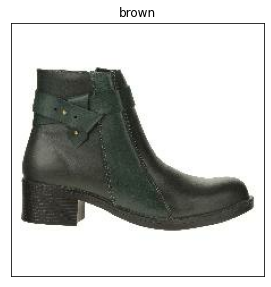

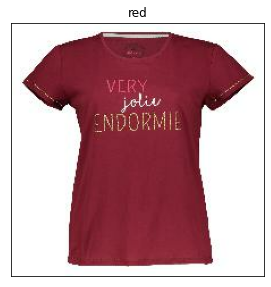

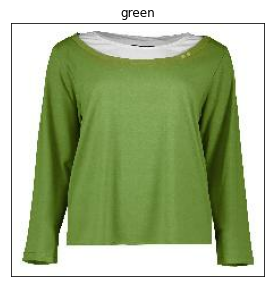

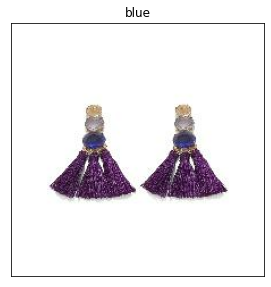

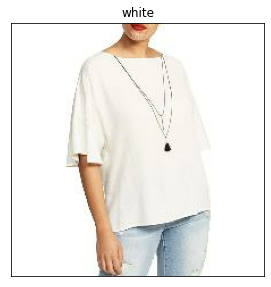

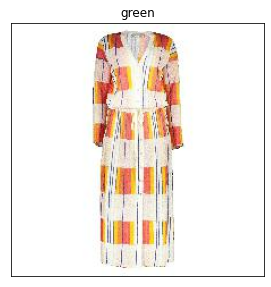

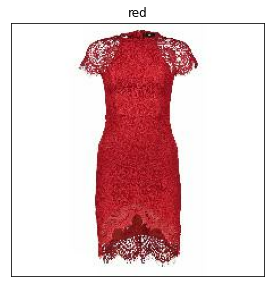

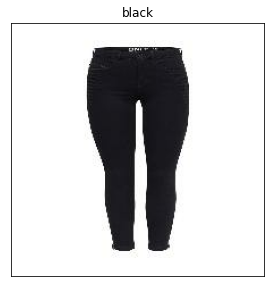

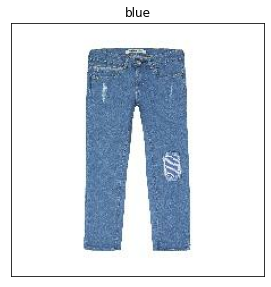

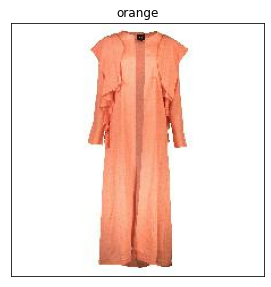

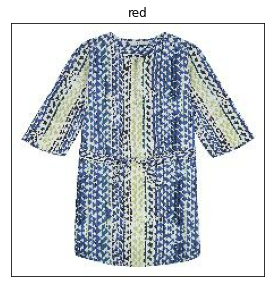

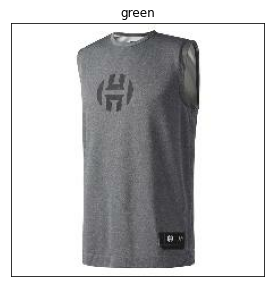

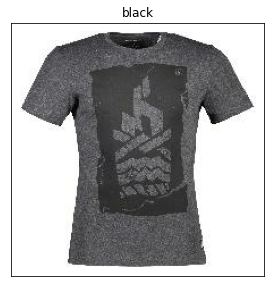

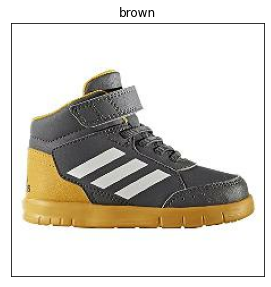

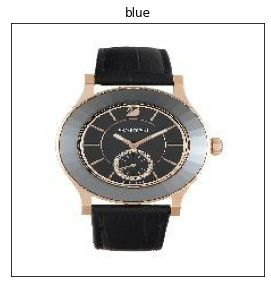

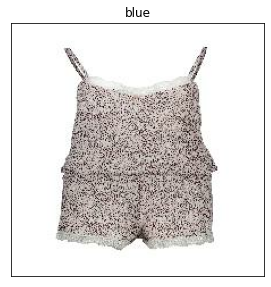

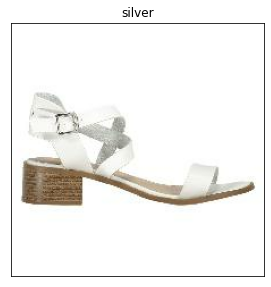

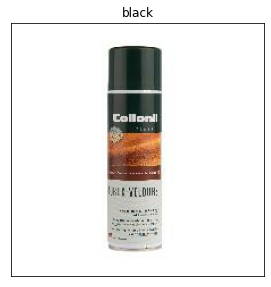

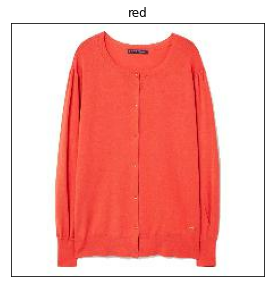

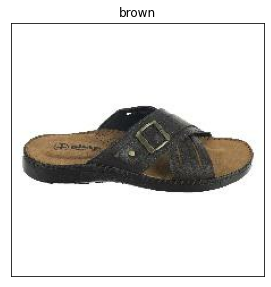

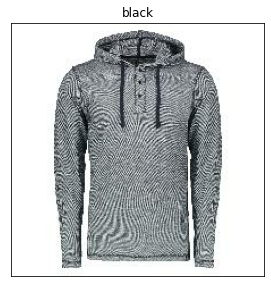

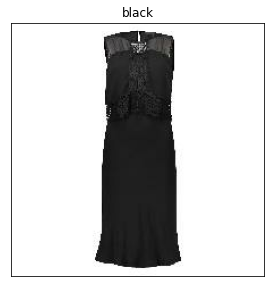

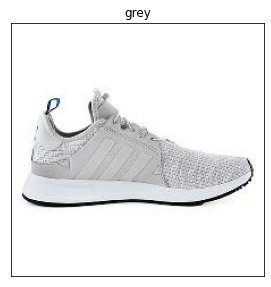

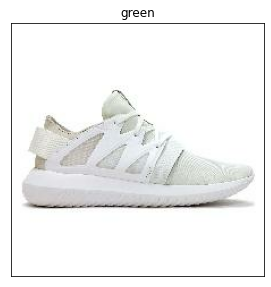

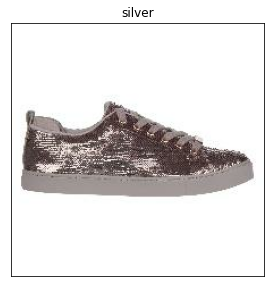

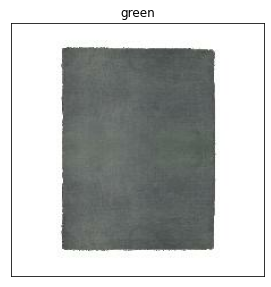

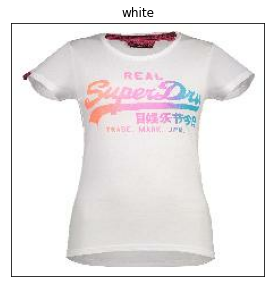

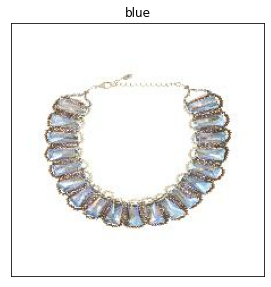

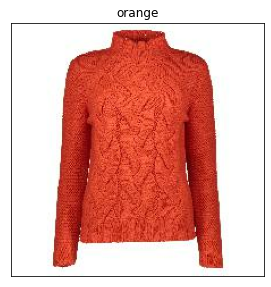

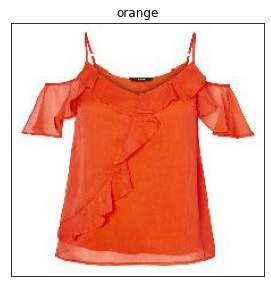

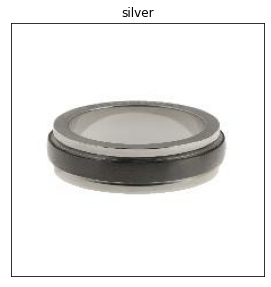

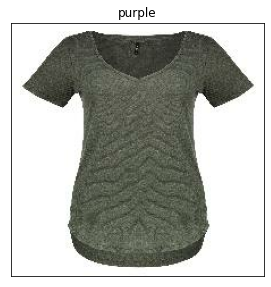

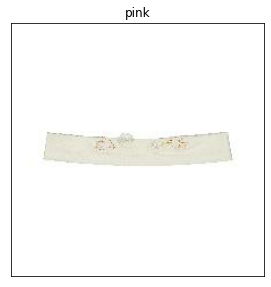

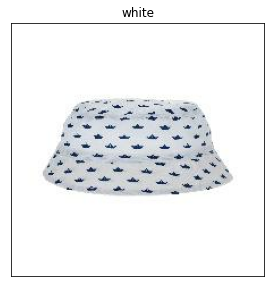

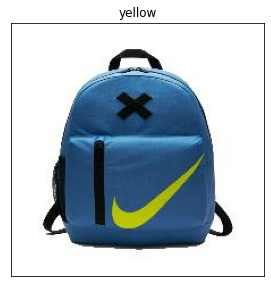

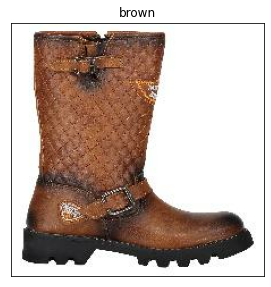

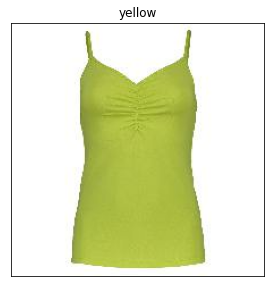

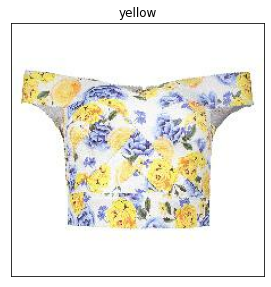

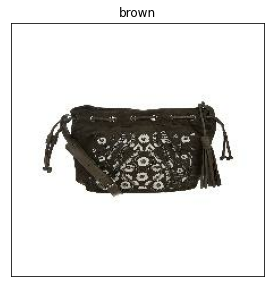

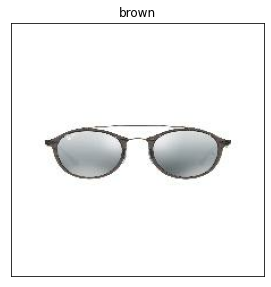

In [202]:
ran=np.random.randint(0,1000)
for i in range(50):
  showMe(i+ran)